This notebook reproduces the key figures and experiments from our [writeup on Induction Heads](https://www.notion.so/Evaluating-Anthropic-s-Induction-Head-Claims-a84793d55332409392e488d2e8b620bd). Very little exposition is done here, and the reader is advised to follow along with the writeup. All section titles other than <i>Setup</i> match the corresponding sections of the writeup.

# Setup

In [11]:
from main import run_experiment
from experiments import make_experiments, make_make_corr, FixedSampler
from utils import compare_saa_in_cui, compare_attns_in_cui
import weights
from interp.circuit.causal_scrubbing.hypothesis import (
    CondSampler,
    ExactSampler,
    UncondSampler,
)

# Preliminary Experiments

The entry point for running causal scrubbing experiments is the `experiments.py` file, which takes in command line arguments, builds experiment specifications, and passes them along to `main.py:run_experiments`. Specifications consist of a correspondence graph and, on many occasions, options for altering the model in various ways to enable the desired experiment.

The following code block bypasses `experiments.py`'s command-line interface by duplicating some of its functionality and calling `main.py:run_experiments` directly in order to reproduce the values from the <i>Preliminary Experiments</i> section of the writeup.

Note: we regrettably changed naming conventions a few times over the course of writing the many experiments specified in `experiments.py`. Those reproduced here have been renamed to match the descriptions in the writeup, but beyond those, the reader is advised not to assume the experiment's name is sufficient for understanding.

In [3]:
experiments = make_experiments(make_make_corr(ExactSampler()))
for exp in ["unscrubbed", "ev", "pth-k", "eq", "all", "baseline", "ev+", "pth-k+", "eq+"]:
    print(f"\n\nRunning experiment {exp}")
    run_experiment(experiments, exp, 10000, "", 0, False, False)



Running experiment unscrubbed
OVERALL
     4.192    10.508   3000000
CANDIDATES
     3.263    11.427    163161
LATER CANDIDATES
     1.166     7.686     36311
REPEATS
     2.499     5.659   1278288
UNCOMMON REPEATS
     3.952    11.540    303868
NERB UR
     5.569     9.987    172779
MISLEADING INDUCTION
     4.837     9.919    182416
CANDIDATE ERB
     0.203     0.538     30721
NFERB UR
     5.761     9.612    158612


Running experiment ev
OVERALL
     4.270    10.392   3000000
CANDIDATES
     3.382    10.846    163147
LATER CANDIDATES
     1.558     6.767     36312
REPEATS
     2.675     6.037   1278308
UNCOMMON REPEATS
     4.556    11.424    303884
NERB UR
     6.013     9.766    172800
MISLEADING INDUCTION
     4.788     9.673    182439
CANDIDATE ERB
     0.760     1.752     30722
NFERB UR
     6.172     9.490    158631


Running experiment pth-k
OVERALL
     4.318    10.685   3000000
CANDIDATES
     3.462    10.952    163161
LATER CANDIDATES
     1.827     7.838     36311
REPE

# 1.5 vs 1.6

## Identifying Parroting

For Subgraph Ablation Attribution, we need to rebuild the experiments using a special sampler so we get several resamples for a single dataset example. Then, we call `main.py:run_experiment` with a few special arguments specifying for the results to be saved in the `results` directory following a specific naming convention. This generates several pickles, which we then pass onto CUI using the `utils.py:compare_saa_in_cui`. In CUI, the "Comparison(example)" parameter should be set to either "facet" or some specific comparison (in the code below, we have only one). We do this here for the scrubbing of head 1.5 to reproduce the corresponding figure from the writeup.

Note: For producing such figures for several experiments and/or indices in a row, the file `get_data.py` provides a simple command-line interface.

In [4]:
experiments = make_experiments(make_make_corr(FixedSampler(4)))
run_experiment(
    experiments,
    "unscrubbed",
    1000,
    "unscrubbed_saa_4",
    0,
    False,
    False,
)
run_experiment(
    experiments,
    "scrub-1.5",
    1000,
    "scrub-1.5_saa_4",
    0,
    False,
    False,
)
compare_saa_in_cui([("unscrubbed", "scrub-1.5")])

OVERALL
     3.691    10.733    300000
CANDIDATES
     3.495    11.479     33000
LATER CANDIDATES
     1.411     9.299      7000
REPEATS
     2.065     6.115    139000
UNCOMMON REPEATS
     2.893    11.646     44000
NERB UR
     4.569    14.252     21000
MISLEADING INDUCTION
     5.006    11.791     21000
CANDIDATE ERB
     0.171     0.076      6000
NFERB UR
     4.717    14.504     20000
OVERALL
     4.099    11.085    300000
CANDIDATES
     4.060    11.102     33000
LATER CANDIDATES
     2.199     7.920      7000
REPEATS
     2.595     7.968    139000
UNCOMMON REPEATS
     4.726    12.179     44000
NERB UR
     6.766     9.850     21000
MISLEADING INDUCTION
     4.860    12.889     21000
CANDIDATE ERB
     1.113     0.978      6000
NFERB UR
     6.850    10.125     20000
Composable UI initialized on localhost:6789!
http://interp-tools.redwoodresearch.org/#/tensors/untitled?port=6789&url=localhost


Visualizing attention patterns for the unscrubbed model can be done using interp-tools directly, since the model we studied is available there as "attention_only_two_layers_untied". However, since we will need to introduce our custom attention visualization function later on, and the test input shown in the writeup is a specific one, we demonstrate usage of our attention visualization functions here.

Similarly to the code block above, we need to save the results of our experiments by calling `main.py:run_experiment` with specific arguments. Then, we invoke `utils.py:compare_attns_in_cui` to process the relevant pickles into CUI. `compare_attns_in_cui` differs from `compare_saa_in_cui` in that each "comparison" can also be a single experiment (rather than only a pair of experiments), so we can visualize the attentions for that particular experiment without comparing them to another one's. In the future, we will likely generalize `compare_saa_in_cui` in a similar fashion.

For the CUI parameters, you should set Comparison to the relevant experiment or comparison you wish to visualize, Heads to the relevant head ("a1.5" in our case), and chart type to "Sided matrix".

In [14]:
experiments = make_experiments(make_make_corr(FixedSampler(4)))
run_experiment(
    experiments,
    "unscrubbed",
    1000,
    "unscrubbed_saa_4",
    0,
    True,
    False,
)
compare_attns_in_cui(["unscrubbed"], "attns", heads_filter=[13], trim_beg=True, max_seq_len=35)

Composable UI server already running on localhost:6789 in this Python process
http://interp-tools.redwoodresearch.org/#/tensors/untitled?port=6789&url=localhost


We run the experiments from the end of the <i>Identifying Parroting</i> subsection similarly to how we ran the preliminary experiments. Here, experiment `scrub-1.6` corresponds to what was called `1.5` in the writeup, and `scrub-1.5` corresponds to `1.6`.

In [15]:
experiments = make_experiments(make_make_corr(ExactSampler()))
for exp in ["scrub-1.6", "scrub-1.5", "1.5-pth-k+", "1.6-pth-k+"]:
    print(f"\n\nRunning experiment {exp}")
    run_experiment(experiments, exp, 10000, "", 0, False, False)



Running experiment scrub-1.6
OVERALL
     4.309    10.364   3000000
CANDIDATES
     3.464    10.882    163147
LATER CANDIDATES
     1.689     7.078     36312
REPEATS
     2.709     5.863   1278308
UNCOMMON REPEATS
     4.506    10.905    303884
NERB UR
     5.812     9.553    172800
MISLEADING INDUCTION
     4.805     9.773    182439
CANDIDATE ERB
     0.908     2.233     30722
NFERB UR
     5.967     9.312    158631


Running experiment scrub-1.5
OVERALL
     4.404    11.248   3000000
CANDIDATES
     3.606    11.018    163129
LATER CANDIDATES
     1.785     6.664     36300
REPEATS
     2.797     7.369   1278282
UNCOMMON REPEATS
     5.271    13.563    303828
NERB UR
     6.850    11.293    172782
MISLEADING INDUCTION
     4.846     9.891    182420
CANDIDATE ERB
     1.047     2.327     30711
NFERB UR
     7.003    10.982    158614


Running experiment 1.5-pth-k+
OVERALL
     4.256    10.770   3000000
CANDIDATES
     3.300    11.335    163147
LATER CANDIDATES
     1.208     7.280    

## Isolating Parroting and Induction in 1.5

Here are experiments `1.5-EK` and `1.5-E46K`:

In [8]:
experiments = make_experiments(make_make_corr(ExactSampler()))
for exp in ["1.5-ek", "1.5-e46k"]:
    print(f"\n\nRunning experiment {exp}")
    run_experiment(experiments, exp, 10000, "", 0, False, False)



Running experiment 1.5-ek
OVERALL
     4.237    10.409   3000000
CANDIDATES
     3.383    10.669    163146
LATER CANDIDATES
     1.581     6.321     36317
REPEATS
     2.616     5.903   1278371
UNCOMMON REPEATS
     4.471    10.860    303868
NERB UR
     5.860     9.462    172756
MISLEADING INDUCTION
     4.740     9.422    182404
CANDIDATE ERB
     0.822     1.730     30723
NFERB UR
     6.003     9.265    158590


Running experiment 1.5-e46k
OVERALL
     4.221    10.366   3000000
CANDIDATES
     3.361    10.704    163129
LATER CANDIDATES
     1.518     6.287     36300
REPEATS
     2.587     5.756   1278282
UNCOMMON REPEATS
     4.336    10.744    303828
NERB UR
     5.725     9.485    172782
MISLEADING INDUCTION
     4.734     9.392    182420
CANDIDATE ERB
     0.748     1.575     30711
NFERB UR
     5.868     9.309    158614


For the attention visualization, we proceeded similarly as in the previous subsection: first we pickle the relevant experiment results, and then call `utils.py:compare_attns_in_cui`. The recommended CUI parameters here are: `facet` for `Comparison`, `a1.5` for `Heads`, `Tiny matrix` for `Chart type`. The example shown in the writeup is Example 3:

In [9]:
experiments = make_experiments(make_make_corr(FixedSampler(3)))
exp_names = ["unscrubbed", "1.5-e46k", "1.5-pth-k+"]
for exp_name in exp_names:
    run_experiment(
        experiments,
        exp_name,
        1000,
        f"{exp_name}_attns_3",
        0,
        True,
        False,
    )
compare_attns_in_cui(exp_names, "attns", heads_filter=[13], trim_beg=True, max_seq_len=60)

Composable UI server already running on localhost:6789 in this Python process
http://interp-tools.redwoodresearch.org/#/tensors/untitled?port=6789&url=localhost


# Layer 0

`weights.py` contains several standalone functions which compute and plot features of interest pertaining to layer 0. Here we reproduce the key figures from the <i>Layer 0</i> section from the writeup (for the UMAP plot the color and scaling may vary from the writeup, but the same information is conveyed):

torch.Size([50, 50])
torch.Size([50, 50])
torch.Size([50, 50])
torch.Size([50, 50])
torch.Size([50, 50])
torch.Size([50, 50])
torch.Size([50, 50])
torch.Size([50, 50])


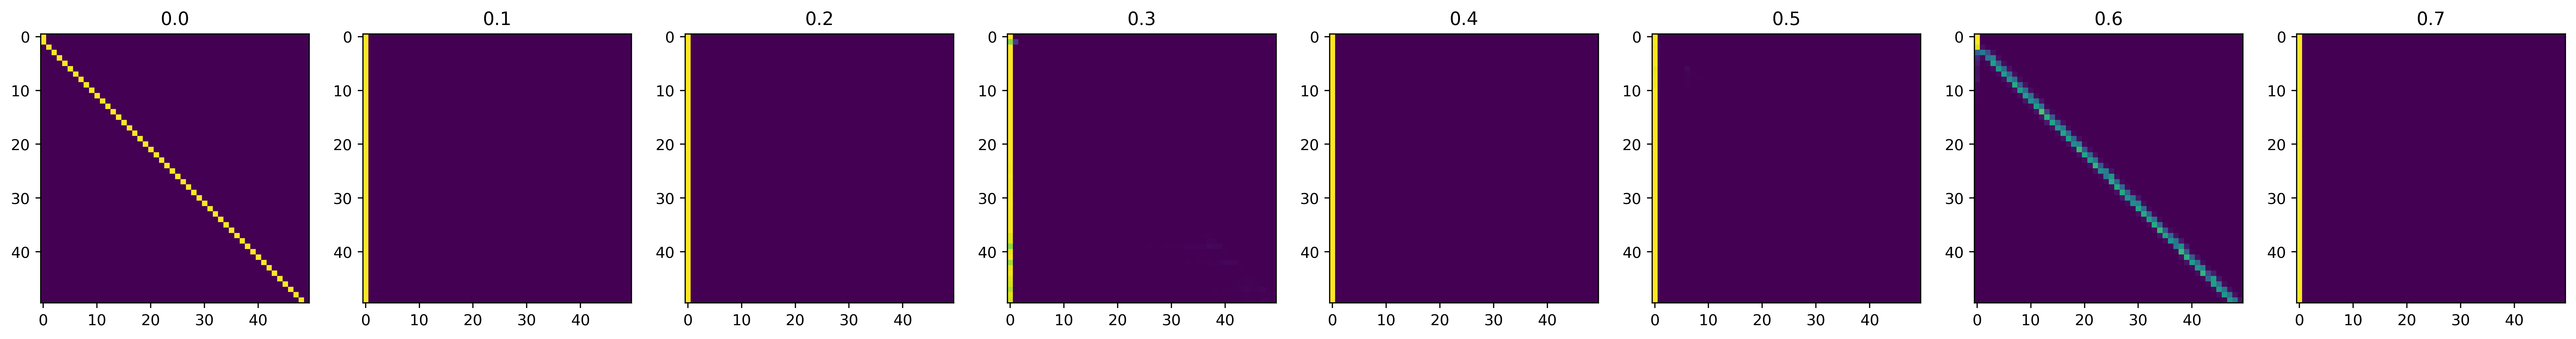

In [12]:
weights.pqpk()

In [ ]:
# This is the code for the UMAP plots. If run, it might crash the notebook, so this is unadvisable. Best to run as a standalone script.
#for head in range(8):
#    k = weights.transform_vocab(0, head, "k", normalise=False, pos=False)
#    q = weights.transform_vocab(0, head, "q", normalise=False, pos=False)
#    weights.embed_plot_many(k, q, labels=["tk", "tq"], title=f"0.{head}", save=False)

In [ ]:
# This is the code for the duplicate token attention results and plots. If run, it might crash the notebook, so this is unadvisable. Best to run as a standalone script.

# weights.autoencoder()

In [13]:
experiments = make_experiments(make_make_corr(ExactSampler()))
for exp in ["unscrubbed", "1.5-zero-0.0", "1.5-beg-0.0", "1.5-pos20-0.0", "scrub-1.5", "1.6-zero-0.0", "1.6-beg-0.0", "1.6-pos20-0.0", "scrub-1.6"]:
    print(f"\n\nRunning experiment {exp}")
    run_experiment(experiments, exp, 10000, "", 0, False, False)



Running experiment unscrubbed
OVERALL
     4.192    10.506   3000000
CANDIDATES
     3.263    11.428    163132
LATER CANDIDATES
     1.166     7.693     36310
REPEATS
     2.499     5.657   1278358
UNCOMMON REPEATS
     3.952    11.537    303835
NERB UR
     5.569     9.984    172761
MISLEADING INDUCTION
     4.836     9.919    182414
CANDIDATE ERB
     0.202     0.537     30716
NFERB UR
     5.760     9.609    158592


Running experiment 1.5-zero-0.0
OVERALL
     4.212    10.338   3000000
CANDIDATES
     3.344    10.738    163134
LATER CANDIDATES
     1.464     6.276     36301
REPEATS
     2.571     5.643   1278329
UNCOMMON REPEATS
     4.261    10.561    303833
NERB UR
     5.635     9.364    172763
MISLEADING INDUCTION
     4.728     9.349    182410
CANDIDATE ERB
     0.683     1.457     30709
NFERB UR
     5.782     9.180    158594


Running experiment 1.5-beg-0.0
OVERALL
     4.213    10.336   3000000
CANDIDATES
     3.345    10.723    163147
LATER CANDIDATES
     1.467     6.26

In [16]:
experiments = make_experiments(make_make_corr(ExactSampler()))
for exp in ["unscrubbed", "real-0.0", "zero-0.0", "beg-0.0", "scrub-0.0"]:
    print(f"\n\nRunning experiment {exp}")
    run_experiment(experiments, exp, 10000, "", 0, False, False)



Running experiment unscrubbed
OVERALL
     4.192    10.507   3000000
CANDIDATES
     3.263    11.428    163147
LATER CANDIDATES
     1.165     7.686     36312
REPEATS
     2.499     5.658   1278308
UNCOMMON REPEATS
     3.952    11.538    303884
NERB UR
     5.569     9.985    172800
MISLEADING INDUCTION
     4.837     9.919    182439
CANDIDATE ERB
     0.202     0.538     30722
NFERB UR
     5.760     9.610    158631


Running experiment real-0.0
OVERALL
     4.202    10.538   3000000
CANDIDATES
     3.267    11.471    163144
LATER CANDIDATES
     1.168     7.803     36312
REPEATS
     2.504     5.697   1278325
UNCOMMON REPEATS
     3.946    11.687    303888
NERB UR
     5.606    10.054    172803
MISLEADING INDUCTION
     4.877    10.052    182443
CANDIDATE ERB
     0.193     0.506     30722
NFERB UR
     5.804     9.649    158636


Running experiment zero-0.0
OVERALL
     4.363    10.403   3000000
CANDIDATES
     3.917    10.693    163153
LATER CANDIDATES
     3.685     9.853     3

In [17]:
# This is the code for the visualization of the cosine similarity of the OV outputs of different layer 0 heads. If run, it might crash the notebook, so this is unadvisable. Best to run as a standalone script.
# weights.pairwise_cosine_sim()